In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import pickle


In [2]:
# Load the dataset
file_path = r'C:\Users\admin\OneDrive\Desktop\pharma project-6\Pharma-project-6\sales_data.csv'
sales_data = pd.read_csv(file_path, low_memory=False)

In [3]:
# Extract features and target
dates = sales_data['Date']
sales = sales_data['Sales']


In [4]:
# Split data into train and test sets
train_size = int(len(sales) * 0.8)
test_size = len(sales) - train_size
train, test = sales[0:train_size], sales[train_size:len(sales)]


In [5]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(np.array(train).reshape(-1, 1))
test_scaled = scaler.transform(np.array(test).reshape(-1, 1))


In [6]:
# Function to create dataset for LSTM
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)


In [7]:
time_step = 1
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [8]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
# Assuming you have X_train and y_train defined
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 68s 2ms/step - loss: 0.0053
Epoch 2/100
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 64s 2ms/step - loss: 0.0049
Epoch 3/100
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step - loss: 0.0049
Epoch 4/100
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - loss: 0.0049
Epoch 5/100
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 63s 2ms/step - loss: 0.0049
Epoch 6/100
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 59s 2ms/step - loss: 0.0049
Epoch 7/100
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 59s 2ms/step - loss: 0.0049
Epoch 8/100
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - loss: 0.0049
Epoch 9/100
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 60s 2ms/step - loss: 0.0049
Epoch 10/100
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 83s 2ms/step - loss: 0.0049
Epoch 11/100
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 61s 2ms/step - loss: 0.0048
Epoch 12/100
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 65s 3ms/step - loss: 0.0049
Epoch 13/100
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 61s 2ms/step - loss: 0.0049
Epoch 14/100
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 5

In [11]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


25431/25431 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step
6358/6358 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


In [14]:
# Inverse transform predictions
train_predict_inv = scaler.inverse_transform(train_predict)
test_predict_inv = scaler.inverse_transform(test_predict)

In [19]:
# Reshape predictions
train_predict_flat = train_predict_inv.flatten()
test_predict_flat = test_predict_inv.flatten()


In [20]:
# Reshape true values (assuming X_train and X_test are 2D arrays)
train_true_flat = X_train.flatten()
test_true_flat = X_test.flatten()

In [21]:
# Calculate MSE
train_mse = mean_squared_error(train_true_flat, train_predict_flat)
test_mse = mean_squared_error(test_true_flat, test_predict_flat)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 6.745728937340803e+16
Test MSE: 6.4750796256237336e+16


In [27]:
import pickle

# Serialize model architecture to JSON
model_json = model.to_json()
with open("lstm_regression_model_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Serialize model weights with the correct filename
model.save_weights("lstm_regression_model_weights.weights.h5")

# Save the scaler object
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [28]:
# Create DataFrames for train and test predictions
train_predictions_df = pd.DataFrame(train_predict_inv, columns=["Predictions"])
test_predictions_df = pd.DataFrame(test_predict_inv, columns=["Predictions"])

# Save train and test predictions to CSV files
train_predictions_df.to_csv("train_predictions.csv", index=False)
test_predictions_df.to_csv("test_predictions.csv", index=False)

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


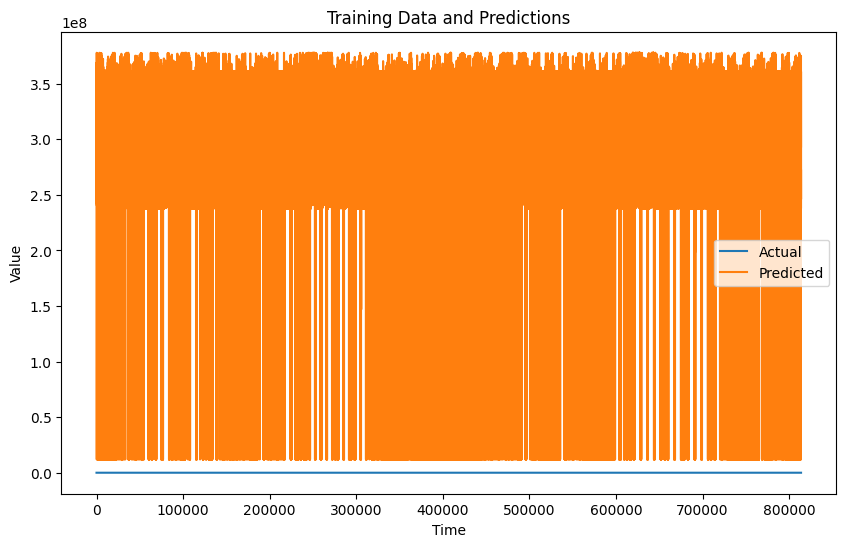

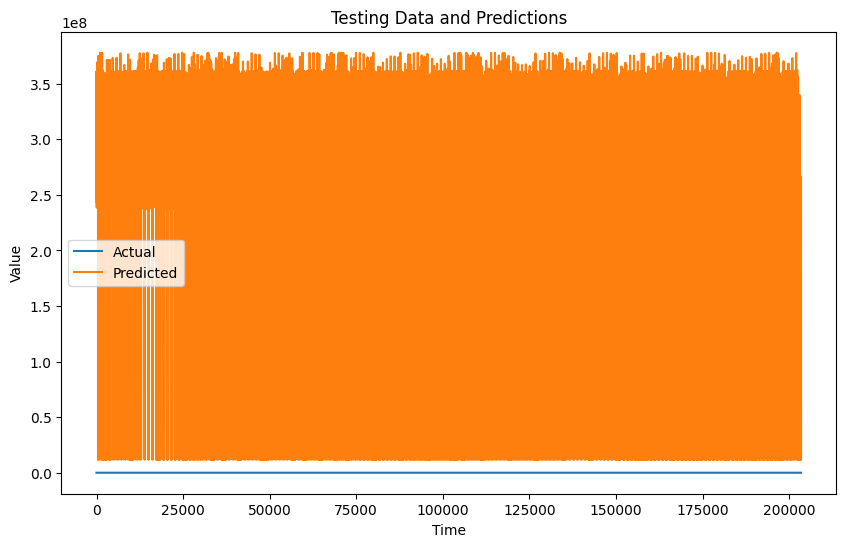

In [29]:
# Visualize training data and predictions
plt.figure(figsize=(10, 6))
plt.plot(y_train, label='Actual')
plt.plot(train_predict_inv, label='Predicted')
plt.title('Training Data and Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Visualize testing data and predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(test_predict_inv, label='Predicted')
plt.title('Testing Data and Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()